In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fer2013/fer2013.csv


In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

2025-10-06 10:08:08.763161: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759745289.163436      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759745289.267514      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [10]:
dataset_path = "/kaggle/input/fer2013"

if not os.path.exists(dataset_path):
    raise FileNotFoundError(
        "FER2013 dataset not found! ➜ Add it from right sidebar → Add Data → Search 'FER2013' → Add"
    )

csv_file = os.path.join(dataset_path, "fer2013.csv")
data = pd.read_csv(csv_file)
print("✅ Dataset loaded! Shape:", data.shape)

✅ Dataset loaded! Shape: (35887, 3)


In [12]:
def str_to_img(s):
    img = np.array(s.split(), dtype='float32').reshape(48,48,1)
    img = img / 255.0
    return img

X = np.array([str_to_img(p) for p in data['pixels']])
y = keras.utils.to_categorical(data['emotion'], 7)

print("Images shape:", X.shape)
print("Labels shape:", y.shape)


Images shape: (35887, 48, 48, 1)
Labels shape: (35887, 7)


In [33]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.15, random_state=42
)

print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)


Training set: (30503, 48, 48, 1)
Validation set: (5384, 48, 48, 1)


In [34]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(7, activation='softmax')
])

model.summary()

# ------------------------------
# Step 7: Compile Model
# ------------------------------
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 620,935 (2.37 MB)

 Trainable params: 619,975 (2.37 MB)

 Non-trainable params: 960 (3.75 KB)

In [35]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=40,
    callbacks=[
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=4, factor=0.5, min_lr=1e-5)
    ],
    verbose=1
)

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1759745538.461028     106 service.cc:148] XLA service 0x7e35b4008720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759745538.462842     106 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1759745538.462869     106 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1759745539.067962     106 cuda_dnn.cc:529] Loaded cuDNN version 90300


  8/477 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.1639 - loss: 2.7899

I0000 00:00:1759745545.254860     106 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


477/477 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.2354 - loss: 2.2709 - val_accuracy: 0.3206 - val_loss: 1.7268 - learning_rate: 0.0010
Epoch 2/40
477/477 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.3540 - loss: 1.6661 - val_accuracy: 0.4237 - val_loss: 1.5280 - learning_rate: 0.0010
Epoch 3/40
477/477 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.4187 - loss: 1.5085 - val_accuracy: 0.4820 - val_loss: 1.3664 - learning_rate: 0.0010
Epoch 4/40
477/477 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.4470 - loss: 1.4388 - val_accuracy: 0.4038 - val_loss: 1.5016 - learning_rate: 0.0010
Epoch 5/40
477/477 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.4707 - loss: 1.3718 - val_accuracy: 0.5212 - val_loss: 1.2642 - learning_rate: 0.0010
Epoch 6/40
477/477 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.4816 - loss: 1.3466 - val_accuracy: 0.5197 - val_loss: 1.2595 - learning_rate: 0.0010
Epoch 7/40
477/477 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.4987 - loss: 1.3155

In [36]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"\n✅ Final Validation Accuracy: {val_acc*100:.2f}%")

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6369 - loss: 0.9600

✅ Final Validation Accuracy: 63.93%


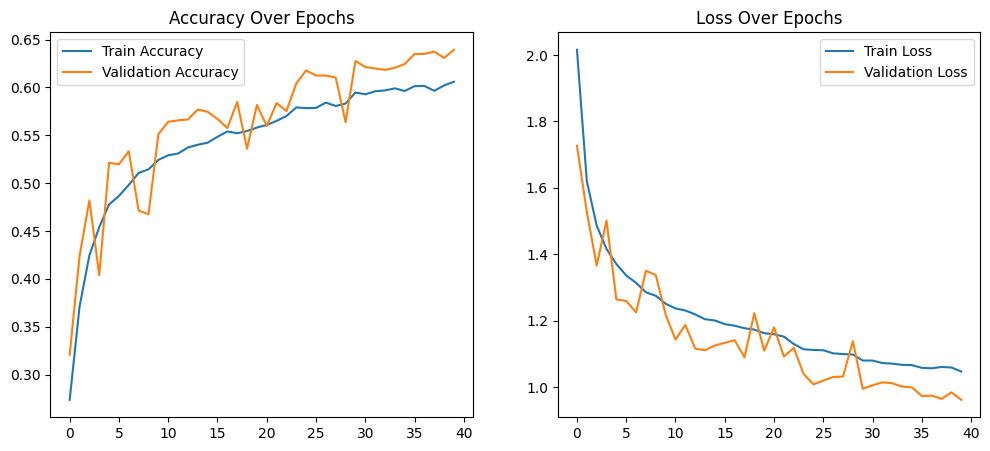

In [37]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Over Epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Over Epochs")
plt.legend()
plt.show()

169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


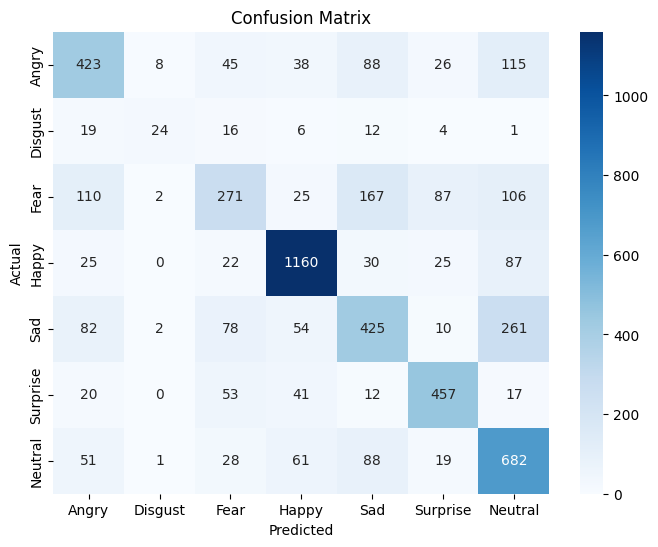

In [38]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"],
            yticklabels=["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [39]:
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=[
    "Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"
]))


Classification Report:

              precision    recall  f1-score   support

       Angry       0.58      0.57      0.57       743
     Disgust       0.65      0.29      0.40        82
        Fear       0.53      0.35      0.42       768
       Happy       0.84      0.86      0.85      1349
         Sad       0.52      0.47      0.49       912
    Surprise       0.73      0.76      0.74       600
     Neutral       0.54      0.73      0.62       930

    accuracy                           0.64      5384
   macro avg       0.63      0.58      0.59      5384
weighted avg       0.64      0.64      0.63      5384

